# unit 2.0 - Learning sequences

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/20-seq-1i.ipynb)

Here we start to study how to code Ai solution for predictive generation. We start to look at how to learn to generate people's names based on a dataset of common first names. We first evaluate a statistical model, then we train the simplest neural network to do this.

Note that in this lecture we try to use an LLM helper to generate some of this code as an experiments in code generation and applicability to coding faster. 

## First: what are sequences?

So far we have studied supervised neural networks, where the training samples were of the type $(input, target)$. A sequence of data sample is instead in the form of $(s_0, s_1, s_2, s_3, ... s_N)$ where $s_i$ is one data point in a sequence. Sequences are for example: temperature over time, stock prices over time, speech and voice and song samples over time, the letters in words, the words in sentences, and many more. 

Sequence learning is a self-supervised learning modality, where you use a portion of the sequence to predict the next item in the sequence. It corresponds to a supervised sample as: $( (s_0, s_1, s_2)  \rightarrow s_3)$ for example. In self-supervised learning there is no explicit "target". We only get a sequence of data as input. The target is induced from the same sequence as "the next" item we want to predict. For this reason sequence learning is also called predictive learning. 

## Words as sequences

As a first example of sequences, we will start here by using the letters in words as a training sequence. Let us start with "First Names" as a possible set of words.


In [1]:
# load dataset of names from: https://github.com/karpathy/makemore/blob/master/names.txt
fn = 'data/names.txt'
names = open(fn, 'r').read().splitlines()
print(names)

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

LLM helper:

from a list of names like : ['Liam', 'Noah',..] convert the list to lowercase in python

In [2]:
def convert_list_to_lowercase(names):
  """Converts a list of names to lowercase.

  Args:
    names: A list of names.

  Returns:
    A list of names in lowercase.
  """

  lowercased_names = []
  for name in names:
    lowercased_names.append(name.lower())

  return lowercased_names

# Create a list of names
# names = ["Liam", "Noah", "Oliver"]

# Convert the list of names to lowercase
names = convert_list_to_lowercase(names)

# Print the list of names in lowercase
print(names)


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

CODE from: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

We use it here to plot the characters biagrams (couples of chars)

In [3]:
# from : https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

import torch

words = names
# we create N: all combinations of 2 characters in names
N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)} # characters (in names) to indices (numbers for computer processing)
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()} # indices to strings (to print for humans)

# let us fill N:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

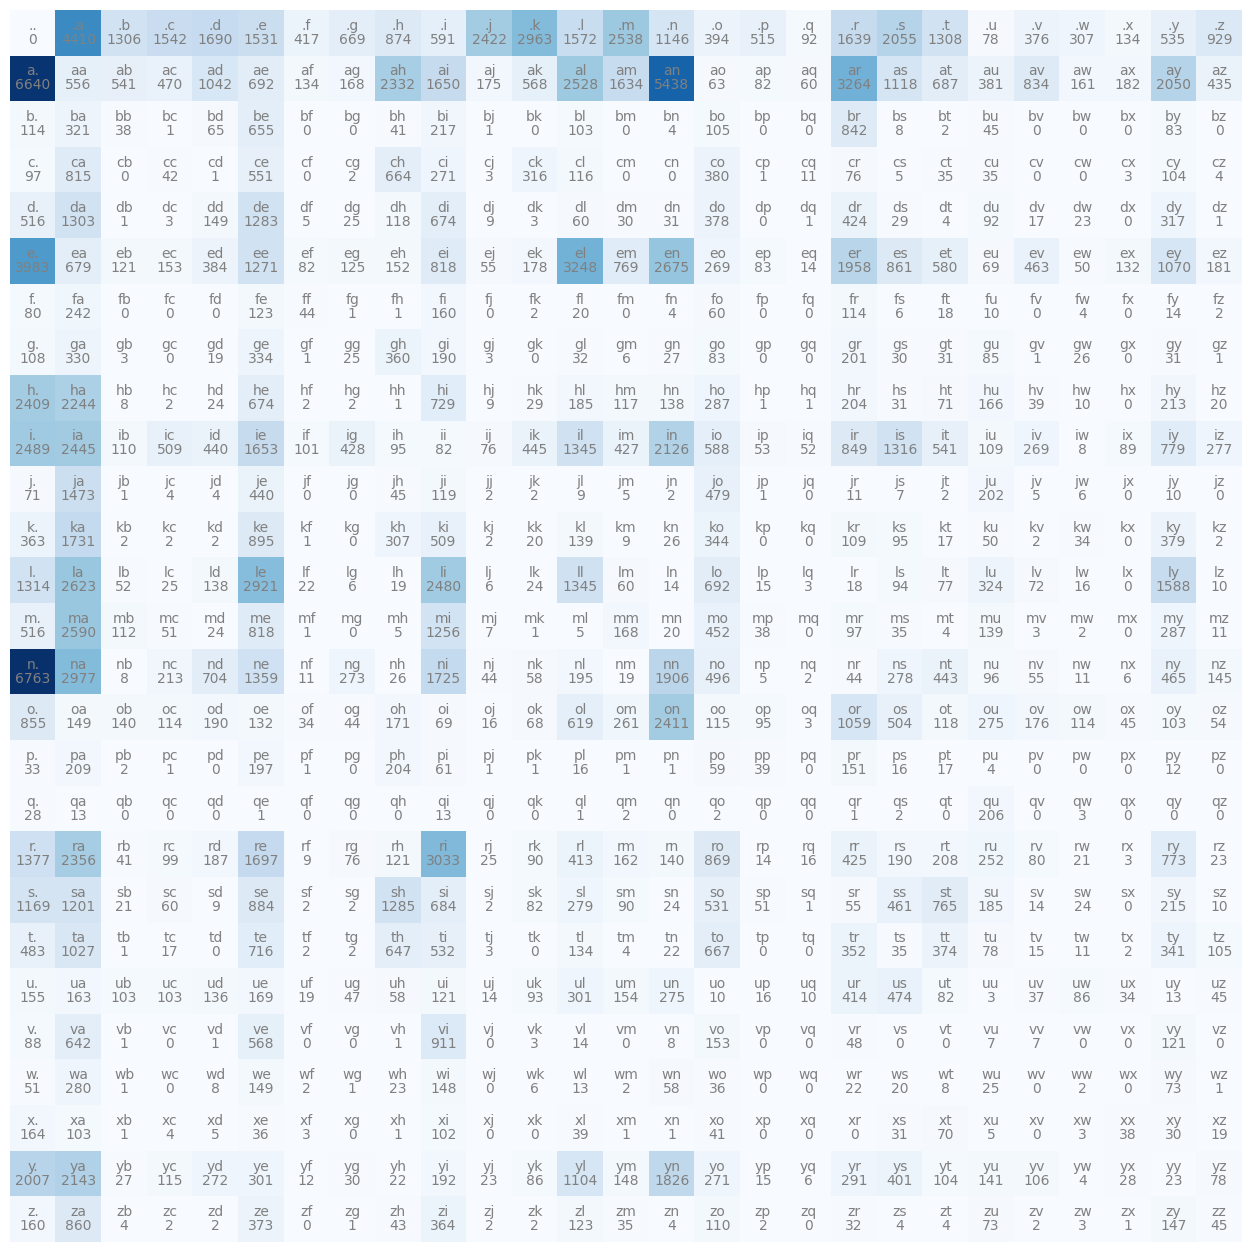

In [4]:
# from : https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb
# plot N: how many times 2 characters appear together in the names

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        # print(i,j)
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

LLM helper:

convert the list of couples of characters: ['li', 'ia', 'am', 'm.', 'no', 'ah', 'h.', 'ol', 'li', 'iv', 've', 'er'] to a 2d tensor in PyTorch with 1st dimension being the index of the first character in the couple and the second dimension the second character in the couple. Subtract the index of ‘a’ from the characters.

In [6]:
def add_dot_at_the_end_of_each_name(names):
  """Adds a "." at the end of each name in a list of names.

  Args:
    names: A list of names.

  Returns:
    A list of names with a "." at the end of each name.
  """

  names_with_dot = []
  for name in names:
    names_with_dot.append("." + name + ".")

  return names_with_dot

def create_couples_of_characters(names):
  """Creates a Python list of couples of characters following each other from a list of names.

  Args:
    names: A list of names.

  Returns:
    A list of couples of characters following each other.
  """

  couples_of_characters = []
  for name in names:
    for i in range(len(name) - 1):
      couple_of_characters = name[i] + name[i + 1]
      couples_of_characters.append(couple_of_characters)

  return couples_of_characters

# Create a list of names
# names = ["Liam", "Noah", "Oliver"]

# Add a "." at the end of each name in the list of names
names_with_dot = add_dot_at_the_end_of_each_name(names)

# Create a Python list of couples of characters following each other
couples_of_characters = create_couples_of_characters(names_with_dot)

# Print the list of couples of characters
print(couples_of_characters)


['.e', 'em', 'mm', 'ma', 'a.', '.o', 'ol', 'li', 'iv', 'vi', 'ia', 'a.', '.a', 'av', 'va', 'a.', '.i', 'is', 'sa', 'ab', 'be', 'el', 'll', 'la', 'a.', '.s', 'so', 'op', 'ph', 'hi', 'ia', 'a.', '.c', 'ch', 'ha', 'ar', 'rl', 'lo', 'ot', 'tt', 'te', 'e.', '.m', 'mi', 'ia', 'a.', '.a', 'am', 'me', 'el', 'li', 'ia', 'a.', '.h', 'ha', 'ar', 'rp', 'pe', 'er', 'r.', '.e', 'ev', 've', 'el', 'ly', 'yn', 'n.', '.a', 'ab', 'bi', 'ig', 'ga', 'ai', 'il', 'l.', '.e', 'em', 'mi', 'il', 'ly', 'y.', '.e', 'el', 'li', 'iz', 'za', 'ab', 'be', 'et', 'th', 'h.', '.m', 'mi', 'il', 'la', 'a.', '.e', 'el', 'll', 'la', 'a.', '.a', 'av', 've', 'er', 'ry', 'y.', '.s', 'so', 'of', 'fi', 'ia', 'a.', '.c', 'ca', 'am', 'mi', 'il', 'la', 'a.', '.a', 'ar', 'ri', 'ia', 'a.', '.s', 'sc', 'ca', 'ar', 'rl', 'le', 'et', 'tt', 't.', '.v', 'vi', 'ic', 'ct', 'to', 'or', 'ri', 'ia', 'a.', '.m', 'ma', 'ad', 'di', 'is', 'so', 'on', 'n.', '.l', 'lu', 'un', 'na', 'a.', '.g', 'gr', 'ra', 'ac', 'ce', 'e.', '.c', 'ch', 'hl', 'lo', 'oe

LLM helper:

convert the list of couples of characters: ['li', 'ia', 'am', 'm.', 'no', 'ah', 'h.', 'ol', 'li', 'iv', 've', 'er'] to a 2d tensor in PyTorch with 1st dimension being the index of the first character in the couple and the second dimension the second character in the couple. Subtract the index of ‘a’ from the characters.

In [7]:
import torch

def to_2d_tensor(couples):
  """Converts a list of couples of characters to a 2D tensor in PyTorch.

  Args:
    couples: A list of couples of characters.

  Returns:
    A 2D tensor in PyTorch with the 1st dimension being the index of the first
    character in the couple and the second dimension the second character in the
    couple.
  """

  tensor = torch.zeros((len(couples), 2), dtype=torch.long)
  for i, couple in enumerate(couples):
    tensor[i, 0] = ord(couple[0]) - ord('a')
    if couple[0] == '.': tensor [i,0] = 0
    tensor[i, 1] = ord(couple[1]) - ord('a')
    if couple[1] == '.': tensor [i,1] = 0
  return tensor

# Convert the list of couples of characters to a 2D tensor in PyTorch.
tensor = to_2d_tensor(couples_of_characters)

# Print the tensor.
print(tensor)


tensor([[ 0,  4],
        [ 4, 12],
        [12, 12],
        ...,
        [24, 25],
        [25, 23],
        [23,  0]])


PROBLEM: '.' index should be 0: adding manually above!


In [8]:
tensor_in = tensor[:,0] # NOTE LIMITING samples to run faster!
tensor_target = tensor[:,1] # NOTE LIMITING samples to run faster!
print(tensor_in[:10])
print(tensor_target[:10])

tensor([ 0,  4, 12, 12,  0,  0, 14, 11,  8, 21])
tensor([ 4, 12, 12,  0,  0, 14, 11,  8, 21,  8])


LLM helper:

Create a neural network that predicts a 1D output tensor from a 1D input tensor, using batches of 16 numbers. The tensors look like:
tensor([ 4, 12, 12,  0, 14, 11,  8, 21,  8,  0])
tensor([12, 12,  0,  0, 11,  8, 21,  8,  0,  0])

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# creating a dataset from 2 characters in names
class myDataset(torch.utils.data.Dataset):
    def __init__(self, array, labels):
        self.array = array
        self.labels = labels

    def __len__(self):
        return len(self.array)

    def __getitem__(self, idx):
        data = self.array[idx]
        labels = F.one_hot(self.labels[idx], num_classes=27).float()
        return data, labels

# create a simple neural network to predict the next character
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(27, 128)
        self.hidden = nn.Linear(128, 128)
        self.output = nn.Linear(128, 27)

    def forward(self, x):
        x = F.relu(self.embedding(x))
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

# Create the predictor model
model = myNet()

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# Create the data loader
train_dataset = myDataset(tensor_in, tensor_target)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
print(train_loader)

In [11]:
# Train the model
num_epochs = 10
with torch.set_grad_enabled(True):
  for epoch in range(num_epochs):
    r_loss = 0
    for x,yt in train_loader:
        # print(x,yt)
        y_pred = model(x)
        loss = loss_fn(y_pred, yt)
        r_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch %1 == 0 or epoch == num_epochs:
      r_loss = r_loss / (tensor_in.size(0))
      print('Loss at epoch:', epoch,' - ', r_loss)

Loss at epoch: 0  -  0.14798709588379272
Loss at epoch: 1  -  0.14711864265855876
Loss at epoch: 2  -  0.14692897543703134
Loss at epoch: 3  -  0.14682720040392605
Loss at epoch: 4  -  0.14676932083742453
Loss at epoch: 5  -  0.14673394149162353
Loss at epoch: 6  -  0.14668973593383172
Loss at epoch: 7  -  0.14664884328405342
Loss at epoch: 8  -  0.1466418102604506
Loss at epoch: 9  -  0.1465995287189392


## Print new names with our trained neural network

Now we print a few names to see if our neural network learned to generate good first names. The neural network, given a character, predicts the next character, meaning that it return an array of 27 probabilities of what the next character index will be. If we always picked the max of these probabilities, the generation of names would be boring, with only a few possibilities. This is because the next characters will be the most common character following the input character! 

Instead, to spice things up, we introduce some CHAOS - randomness!!! We take the output probabilities and we create a probability distribution using "torch.multinomial". Then we sample the distribution to get the next character. This basically introduces some randomness, and instead of always picking the most likely character, it will pick other character based on their relative probability of appearance. 

This way we can get more interesting names. 

In [22]:
# from: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb
# sample from the model

num_runs = 10
print(f"Here we generate {num_runs} names:\n")
g = torch.Generator().manual_seed(2147483647)
for i in range(num_runs):
  out = []
  # ix = torch.randint(27,(1,))
  ix = torch.Tensor([0]).long()
  while(True):
    with torch.no_grad():
      logits = model(ix)

    probs = F.softmax(logits, dim=1)
    oc = torch.multinomial(probs, num_samples=1, generator=g).item()
    out.append(itos[oc])
    if oc == 0:
      break
  print(''.join(out))

Here we generate 10 names:

cqxbm.
mjglkurkimq.
k.
xhkmmmjimj.
maimrlkgdk.
kk.
.
.
.
r.


Take note of the value of the loss: hovers around 1.46
we will compare this to more sophisticated algorithms in the next lectures!

Also note the names produced are not really good... work to be done!

## Homework:

Try to generate names without the randomness / torch.multinomial. Always pick the max. See what happens!